## Day 6

In [4]:
from collections import defaultdict

import numpy as np

def findAreas(coord,o=0,plot=False):

    xmin = 10**32
    xmax = 0
    ymin = 10**32
    ymax = 0

    for x,y in coord:
        if x>xmax: xmax=x
        if y>ymax: ymax=y
        if x<xmin: xmin=x
        if y<ymin: ymin=y

    plane = np.zeros((xmax-xmin+2*o+1,ymax-ymin+2*o+1))
    area = defaultdict(lambda: 0)
    
    for x in range(xmin-o,xmax+o):
        for y in range(ymin-o,ymax+o):
            if (x,y) in coord:
                continue
            md = []
            for xc,yc in coord:
                md.append(abs(xc-x)+abs(yc-y))
            if md.count(min(md))>1:
                continue
            else:
                area[coord[md.index(min(md))]] += 1
                xc,yc = coord[md.index(min(md))]
                if plot:
                    plane[x-xmin,y-ymin] = md.index(min(md))
    
    if plot:
        for xc,yc in coord:
            plane[xc-xmin,yc-ymin] = -1
            
    return area,plane

def largestAreas(coord):
    area0,_ = findAreas(coord,o=0)
    areaO,_ = findAreas(coord,o=10)
    areas = []
    for c in area0.keys():
        if area0[c]==areaO[c]:
            areas.append(area0[c])
    return max(areas)+1 # add central point!!

def findSafeAreas(coord,d=32,o=0,plot=False):

    xmin = 10**32
    xmax = 0
    ymin = 10**32
    ymax = 0

    for x,y in coord:
        if x>xmax: xmax=x
        if y>ymax: ymax=y
        if x<xmin: xmin=x
        if y<ymin: ymin=y
    
    plane = np.zeros((xmax-xmin+2*o+1,ymax-ymin+2*o+1))
    area = 0
    
    for x in range(xmin-o,xmax+o):
        for y in range(ymin-o,ymax+o):
            #if (x,y) in coord:
            #    continue
            dtot = 0
            for xc,yc in coord:
                dtot += abs(xc-x)+abs(yc-y)
            if dtot < d:
                area += 1
                if plot:   
                    plane[x-xmin,y-ymin] = 1
    
    if plot:
        for xc,yc in coord:
            plane[xc-xmin,yc-ymin] = -1
    
    return area,plane

In [11]:
coord_test = [
    (1, 1),
    (1, 6),
    (8, 3),
    (3, 4),
    (5, 5),
    (8, 9)
]

with open("data/input06.txt") as f:
    coord = []
    for l in f.readlines():
        x,y = l.strip("\n").split(", ")
        coord.append((int(x),int(y)))

print("Test 1:",largestAreas(coord_test))
print("Part 1:",largestAreas(coord))

at,_=findSafeAreas(coord_test,d=32,plot=False)
print("Test 2:",at)

a,ps=findSafeAreas(coord,d=10000,plot=True)
print("Part 2:",a)

Test 1: 17
Part 1: 3449
Test 2: 16
Part 2: 44868


In [6]:
_,p = findAreas(coord,o=0,plot=True)

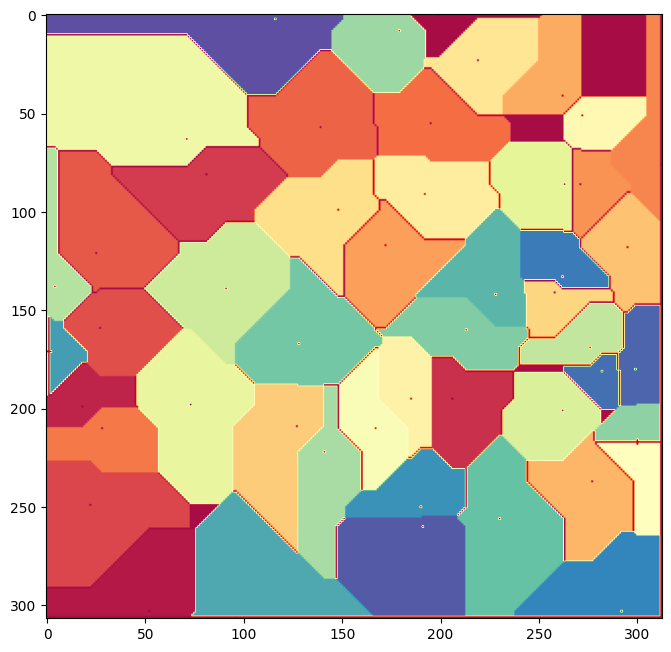

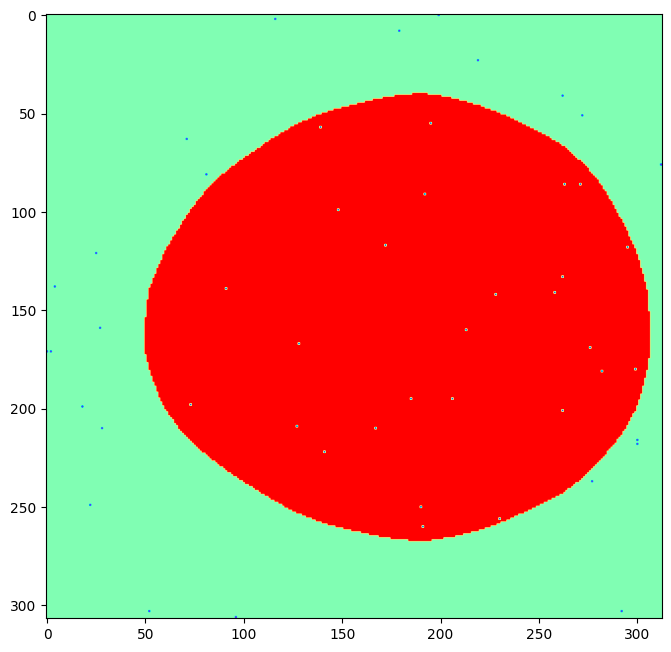

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8),dpi=100)
plt.imshow(p,cmap="Spectral")

plt.figure(figsize=(8,8),dpi=100)
plt.imshow(ps,cmap="rainbow")